# Extreme Temperatures in Stuttgart from 1999 to 2019

Here is the Python code for plotting a line graph of the record high and record low temperatures by day of the year over the period 2009-2018 in the area of Stuttgart, Germany.

The area between the record high and record low temperatures for each day is shaded. A scatter of the 2019 data for any points (highs and lows) for which the ten year record (2009-2018) record high or record low was broken in 2019.

Leap days (i.e. February 29th) is removed for the purpose of this visualization.

The climate data used in this file comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

You must install the python package `mplleaflet` to run the geo plotting below. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print('matplotlib version: ', matplotlib.__version__)
print('pandas version: ', pd.__version__)
print('numpy version: ', np.version.version)

matplotlib version:  3.1.3
pandas version:  1.0.3
numpy version:  1.18.1


In [2]:
# load the cvs files and concatenate them together to one dataframe

df1 = pd.read_csv('data/Stuttgart_climate_19990101-20081231.csv')
df2 = pd.read_csv('data/Stuttgart_climate_20090101-20191231.csv')

frames = [df1, df2]

data = pd.concat(frames)
data.head()

C:\dev\runtime\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,GME00125338,"BAD LIEBENZELL, GM",48.7733,8.7294,352.0,1999-01-01,0.0,",,E",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
1,GME00125338,"BAD LIEBENZELL, GM",48.7733,8.7294,352.0,1999-01-02,3.7,",,E",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
2,GME00125338,"BAD LIEBENZELL, GM",48.7733,8.7294,352.0,1999-01-03,3.5,",,E",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
3,GME00125338,"BAD LIEBENZELL, GM",48.7733,8.7294,352.0,1999-01-04,0.8,",,E",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN
4,GME00125338,"BAD LIEBENZELL, GM",48.7733,8.7294,352.0,1999-01-05,0.0,",,E",0.0,",,E",NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# how many records?
len(data)

181475

In [4]:
# TMAX and TMIN are the columns we are going to use.
# drop lines where value of TAVG
data.dropna(subset = ['TMAX', 'TMIN'], inplace = True)

In [5]:
# how many records?
len(data)

117398

In [6]:
df_t = data.drop(columns=['PRCP', 'PRCP_ATTRIBUTES', 'SNWD', 
                          'SNWD_ATTRIBUTES', 'TAVG_ATTRIBUTES', 
                          'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES'])
df_t.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
5645,GME00126922,"OBERSULM WILLSBACH, GM",49.1289,9.3533,230.0,2004-07-01,NaN,20.6,12.9
5646,GME00126922,"OBERSULM WILLSBACH, GM",49.1289,9.3533,230.0,2004-07-02,NaN,20.4,10.6
5647,GME00126922,"OBERSULM WILLSBACH, GM",49.1289,9.3533,230.0,2004-07-03,NaN,20.9,11.1
5648,GME00126922,"OBERSULM WILLSBACH, GM",49.1289,9.3533,230.0,2004-07-04,NaN,25.5,14.0
5649,GME00126922,"OBERSULM WILLSBACH, GM",49.1289,9.3533,230.0,2004-07-05,NaN,26.0,10.9


In [7]:
import mplleaflet

stations = data[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']]

s = stations.drop_duplicates()

# plot the stations on a map

lons = s.LONGITUDE.tolist()
lats = s.LATITUDE.tolist()

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

mplleaflet.display()

C:\dev\runtime\anaconda\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [8]:
pd.DatetimeIndex?

In [9]:
# get the handle of the date_idx object
date_idx = pd.DatetimeIndex(data.DATE)

date_idx

DatetimeIndex(['2004-07-01', '2004-07-02', '2004-07-03', '2004-07-04',
               '2004-07-05', '2004-07-06', '2004-07-07', '2004-07-08',
               '2004-07-09', '2004-07-10',
               ...
               '2013-05-04', '2013-05-05', '2013-05-06', '2013-05-07',
               '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-11',
               '2013-05-12', '2013-05-13'],
              dtype='datetime64[ns]', name='DATE', length=117398, freq=None)

In [10]:
date_idx.max()

Timestamp('2019-12-31 00:00:00')

In [11]:
# remove the leap days: Feb 29
data = data[~((date_idx.is_leap_year) & (date_idx.month == 2) & (date_idx.day == 29))]

# how many records remaining?
len(data)

117323

In [12]:
# recompute the date_idx
date_idx = pd.DatetimeIndex(data.DATE)

In [13]:
# create 'month' and 'day' indices for further grouping
data['Month'] = date_idx.month
data['Day'] = date_idx.day

# split the data
split_date = '2019-01-01'
data_2019 = data[date_idx >= split_date]
data = data[date_idx < split_date]

In [14]:
# get the maximum temperature records
temp_max = data.groupby(["Month", "Day"])['TMAX'].max()

temp_max.head()

Month  Day
1      1      14.9
       2      14.1
       3      14.3
       4      13.7
       5      18.4
Name: TMAX, dtype: float64

In [15]:
# get the minimum temperature records
temp_min = data.groupby(["Month", "Day"])['TMIN'].min()

temp_min.head()

Month  Day
1      1     -14.0
       2     -17.1
       3     -14.0
       4     -16.2
       5     -17.8
Name: TMIN, dtype: float64

In [16]:
# get the 2019 maximum temperatures
temp_2019_max = data_2019.groupby(["Month", "Day"])['TMAX'].max()

temp_2019_max.head()

Month  Day
1      1      6.6
       2      4.9
       3      1.1
       4      2.2
       5      4.4
Name: TMAX, dtype: float64

In [17]:
# get the 2019 minimum temperatures
temp_2019_min = data_2019.groupby(["Month", "Day"])['TMIN'].min()

temp_2019_min.head()

Month  Day
1      1      0.7
       2     -4.3
       3     -7.5
       4     -3.4
       5     -1.1
Name: TMIN, dtype: float64

In [18]:
# days in 2019 whose max or min temperatures broke historical records in last 10 years
new_max_2019 = (temp_2019_max > temp_max)
print(np.sum(new_max_2019))

new_min_2019 = (temp_2019_min < temp_min)
print(np.sum(new_min_2019))

19
11


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)

In [20]:
observation_axis = np.arange('2019-01-01', '2020-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

In [21]:
plt.plot?

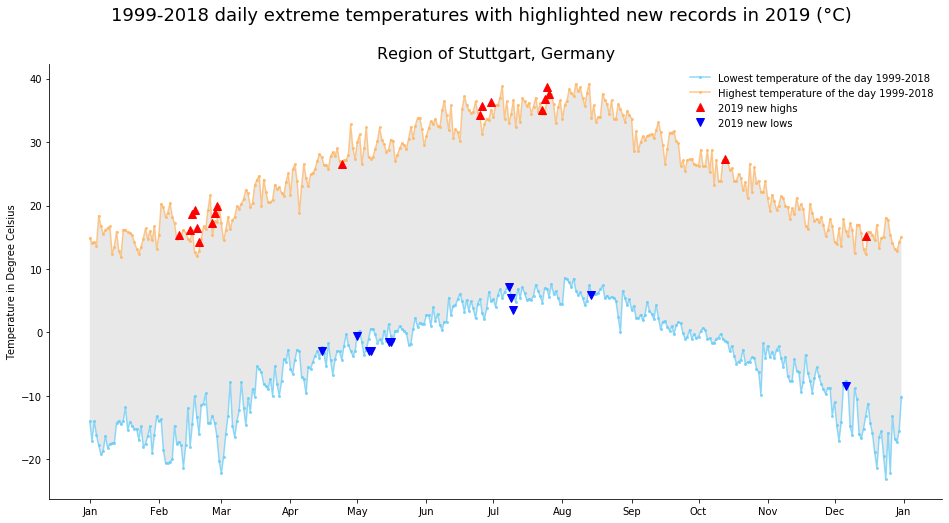

In [22]:
import matplotlib.dates as mdates

plt.suptitle("1999-2018 daily extreme temperatures with highlighted new records in 2019 (°C)", fontsize = 18)
plt.title("Region of Stuttgart, Germany", fontsize=16)
plt.ylabel('Temperature in Degree Celsius')

# This is crucial, see https://stackoverflow.com/questions/47404653/pandas-0-21-0-timestamp-compatibility-issue-with-matplotlib
pd.plotting.register_matplotlib_converters()  

# historical daily extremes
plt.plot(observation_axis, 
         temp_min.to_numpy(),
         '-o', color='#69cdf8', ms=2, alpha=0.75) 
plt.plot(observation_axis, temp_max.to_numpy(), '-o', color='#ffb665', ms=2, alpha=0.75)

# 2019 new records
plt.plot(observation_axis[new_max_2019], temp_2019_max[new_max_2019], 'r^',
         observation_axis[new_min_2019], temp_2019_min[new_min_2019], 'bv', 
         ms=8, alpha=1.0)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.legend(['Lowest temperature of the day 1999-2018', 
            'Highest temperature of the day 1999-2018', 
            '2019 new highs', '2019 new lows'], 
            frameon = False)
           # loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

plt.gca().fill_between(observation_axis, temp_min, temp_max, facecolor='grey', alpha=0.18)

# remove unnecessary frames
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)